<b>Nota</b>: este Notebook está basado en una práctica desarrollada en un curso de DSP por la 
École Polytechnique Fédérale de Lausanne ‐ EPFL


# Transmisión digital vs analógica


En este Notebook exploraremos las ventajas de la transmisión digital sobre la transmisión analógica, tal y como vimos en el tema de Introducción. Consideraremos un escenario en el que necesitamos transmitir datos a larga distancia (ej. a través de un cable transoceánico) por lo que es necesario tener diferentes repetidores. 



Recuerda que al mandar la señal por cada segmento de cable (canal) se introducirá una atenuación de $ 1 / G $ y un ruido  aditivo. Podemos compensar la atenuación con un repetidor con ganancia $ G $ pero el ruido también se amplificará de modo que, después de $ N $ repetidores, el ruido se habrá amplificado $ N $ veces:

$$
    \hat{x}_N(t)  = x(t) + NG\sigma(t)
$$

![Esquema transmision analógica](./transmision_analogica.png)




Al emplear señales digitales podremos añadir funciones de umbralización después de cada repetidor para eliminar el ruido en cada etapa por "software". Empleando este esquema la señal llegaría a destino sin ruido.

$$
    \hat{x}(t)  = sgn[x(t) + G\sigma(t)]
$$


![Esquema transmision digital](./transmision_digital.png)

In [1]:
#librerias necesarias para la práctica
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)

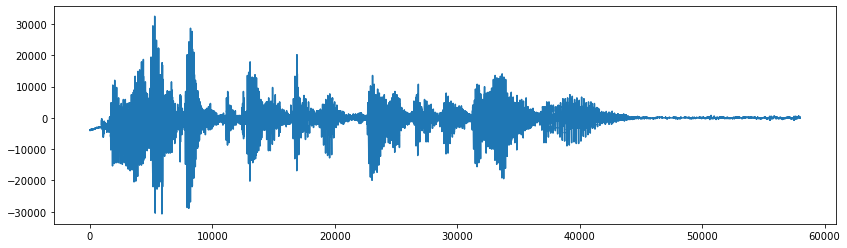

In [2]:
#Cargamos un mensaje de voz
rate, s = wavfile.read('mensaje.wav') #Return the sample rate (in samples/sec) and data from an LPCM WAV file
plt.plot(s)
IPython.display.Audio(s, rate=rate)


## La señal analógica y la señal digital ##

Crearemos una versión digital y otra analógica de la señal para nuestro experimento. Obviamente la señal analógica no será auténtica, ya que estamos en un dispositivo digital, será una simulación muy sencilla asumiendo que empleando valores en punto flotante tenemos precisión infinita. En la versión digital tendremos una señal discretizada con valores entre -100 y 100 (aprox. 8 bits por muestra)



[-11.81102362 -11.81102362 -12.5984252  -12.5984252  -11.81102362
 -11.81102362 -11.81102362 -12.5984252  -12.5984252  -11.81102362
 -12.5984252  -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -12.5984252  -11.81102362 -12.5984252  -12.5984252  -12.5984252
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362
 -11.81102362 -11.81102362 -11.81102362 -11.81102362 -11.81102362]


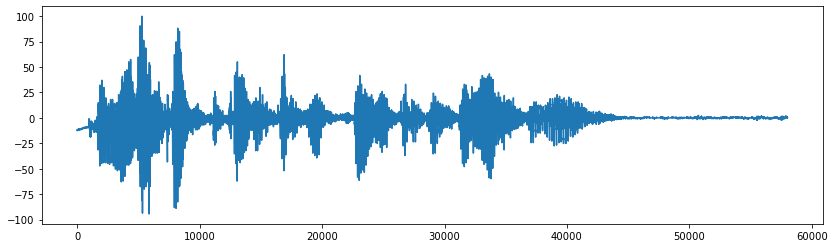

[-12. -12. -13. -13. -12. -12. -12. -13. -13. -12. -13. -12. -12. -12.
 -12. -13. -12. -13. -13. -13. -12. -12. -12. -12. -12. -12. -12. -12.
 -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.
 -12. -12. -12. -12. -12. -12. -12. -12.]


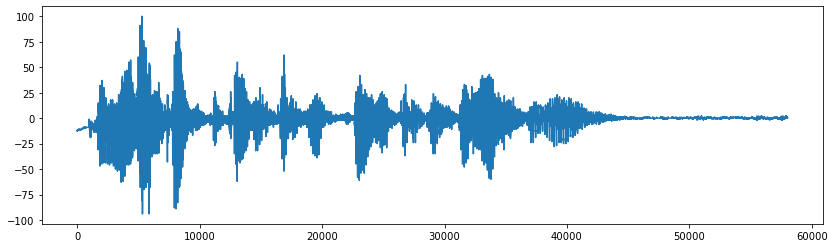

In [3]:
# Rescalado simple de la señal, entre -100 y 100 con valores 'analógicos'
norm = 1.0 / max(np.absolute([min(s), max(s)]))
analogica = 100.0 * s * norm
print(analogica[:50])
plt.plot(analogica)
plt.show()
#discretización de los valores para la señal digital
digital = np.round(analogica)
print(digital[:50])
plt.plot(digital)
plt.show()


### Discretización de valores
La discretización de valores lleva asociada una pérdida de calidad que es el precio que tenemos que pagar por transmitir las señales digitales. Podemos minimizar la pérdida de calidad empleando más bits por muestra.


Si ploteamos la diferencia entre ambas señales veremos que está entre -0.5 y 0.5. Esto es por el redondeo del número real al entero.

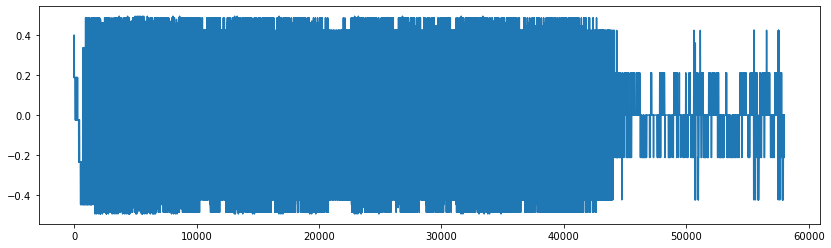

In [4]:
plt.plot(analogica-digital)

### Signal Noise Rate
La relación señal/ruido (<b>SNR</b>) se define como la proporción existente entre la potencia de la señal que se transmite y la potencia del ruido que la corrompe. Este valor suele expresarse en forma logarítmica, normalmente en decibelios. Menor SNR, menor calidad

In [5]:

def SNR(final, original):
    # potencia del error
    ruido = np.linalg.norm(original-final)
    # potencia de la señal
    sig = np.linalg.norm(original)
    # SNR en decibelios
    return 10 * np.log10(sig/ruido)


print("SNR:  {0} dB".format(SNR(digital, analogica)))


SNR:  16.15438161978368 dB


¿Puedes notar la diferencia entre la señal "analógica" y la "digital"?

In [6]:
IPython.display.Audio(analogica, rate=rate)

In [7]:
IPython.display.Audio(digital, rate=rate)

## Transmisión de la señal 

Necesitamos definir una función que represente el efecto de transmitir la señal por un segmento del cable en el que se produzcan los siguientes efectos
* La señal es atenuada
* La señal acumula ruido
* La señal es amplificada por un repetidor para compensar la atenuación



In [8]:
def transmission_analogica(signal, amplitud_ruido, factor_atenuacion):
    nsignal=signal.copy()
    # escribir el código
    # Atenuamos la señal
    nsignal2 = factor_atenuacion * nsignal
    # Creamos el ruido. Se puede usar la función np.random.uniform
    ruido = np.random.uniform(-amplitud_ruido, +amplitud_ruido, len(nsignal))
    # Añadimos el ruido
    nsignal3 = nsignal2 + ruido
    # Compensamos la atenuación 
    nsignal4 = nsignal3 / factor_atenuacion
    # Devolvemos la señal
    return nsignal4

### Transmisión de la señal  digital
Para la señal digital necesitamos una función que genere una umbralización. En este caso tan sencillo podemos simplemente volver a repetir el proceso de "digitalización" que empleamos anteriormente


In [9]:
# def signal_threshold(signal):
#    tsignal=signal.copy()
#    ##escribir el código para la umbralización
#    return tsignal

def transmission_digital(signal, amplitud_ruido, factor_atenuacion):
    nsignal=signal.copy()
    # escribir el código
    # Atenuamos la señal
    nsignal2 = factor_atenuacion * nsignal
    # Creamos el ruido. Se puede usar la función np.random.uniform
    ruido = np.random.uniform(-amplitud_ruido, +amplitud_ruido, len(nsignal))
    # Añadimos el ruido
    nsignal3 = nsignal2 + ruido
    # Compensamos la atenuación 
    nsignal4 = nsignal3 / factor_atenuacion
    nsignal5 = np.round(nsignal4)
    # Devolvemos la señal
    return nsignal5

### Transmision de las señales analógicas y digitales
Ahora tenemos que transmitir las señales y ver la diferencia
Tenemos que definir:
* El número de segmentos que va a cruzar en nuestra comunicación transoceánica
* Un valor de amplitud para el ruido (poned un valor pequeño menor que 0.3)
* Un valor de atenuacion

Posibles valores iniciales

- SEGMENTOS = 70
- AMPLITUD_RUIDO = 0.2
- ATENUACION = 0.5


In [10]:
#definiciones necesarias para las funciones
SEGMENTOS = 70
AMPLITUD_RUIDO = 0.2
ATENUACION = 0.5

#las señales resultantes las almacenaremos en y_analogica e y_digital
y_digital=y_analogica=None

In [11]:
#En esta celda crearemos la transmision analogica
#
#
#
#y_analogica= analogica.copy() if y_analogica is None else y_analogica# solo tiene sentido mientras no poneis vuestro código

signal = analogica.copy()
for i in range(0, SEGMENTOS):
    y_analogica = transmission_analogica(signal, AMPLITUD_RUIDO, ATENUACION)
    signal = y_analogica.copy()

print ('Transmision analógica: SNR = %f dB' % SNR(y_analogica, analogica))    



Transmision analógica: SNR = 7.435847 dB


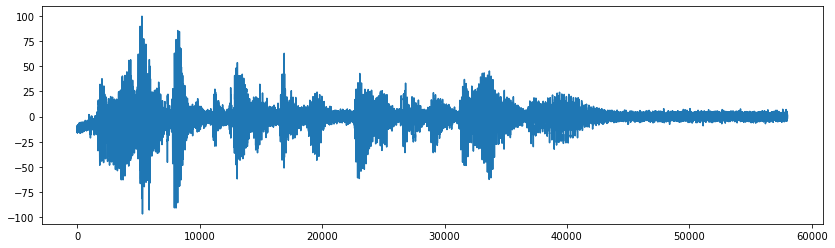

In [12]:
#Prueba de la señal analógica
plt.plot(y_analogica)
IPython.display.Audio(y_analogica, rate=rate)

In [13]:
#En esta celda crearemos la transmision digital
#
#
#
#y_digital= digital.copy() if y_digital is None else y_digital # solo tiene sentido mientras no poneis vuestro código

signal = digital.copy()
for i in range(0, SEGMENTOS):
    y_digital = transmission_digital(signal, AMPLITUD_RUIDO, ATENUACION)
    signal = y_digital.copy()

print ('Transmision digital: SNR = %f dB' % SNR(y_digital, analogica)) 

Transmision digital: SNR = 16.154382 dB


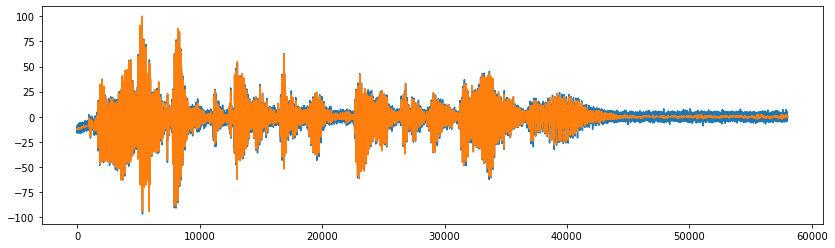

In [14]:
#Prueba de la señal digital
plt.plot(y_analogica)
plt.plot(y_digital)
plt.show()
IPython.display.Audio(y_digital, rate=rate)

#### Ejercicio 1
Dejando los valores de amplitud de ruido y de atenuación constantes, vamos a modificar los segmentos por los que se transmite probando de 1 a 150 y graficamos el SNR de la señal analógica y el de la digital para ver el efecto

Transmision analógica: SNR = 16.667925 dB
Transmision analógica: SNR = 14.277962 dB
Transmision analógica: SNR = 12.779338 dB
Transmision analógica: SNR = 11.696118 dB
Transmision analógica: SNR = 10.815875 dB
Transmision analógica: SNR = 10.088499 dB
Transmision analógica: SNR = 9.442278 dB
Transmision analógica: SNR = 8.889424 dB
Transmision analógica: SNR = 8.395717 dB
Transmision analógica: SNR = 7.962703 dB
Transmision analógica: SNR = 7.562591 dB
Transmision analógica: SNR = 7.200050 dB
Transmision analógica: SNR = 6.864774 dB
Transmision analógica: SNR = 6.568645 dB
Transmision analógica: SNR = 6.272134 dB
Transmision analógica: SNR = 6.000966 dB
Transmision analógica: SNR = 5.742752 dB
Transmision analógica: SNR = 5.498763 dB
Transmision analógica: SNR = 5.270208 dB
Transmision analógica: SNR = 5.053687 dB
Transmision analógica: SNR = 4.845057 dB
Transmision analógica: SNR = 4.641156 dB
Transmision analógica: SNR = 4.451503 dB
Transmision analógica: SNR = 4.271387 dB
Transmisio

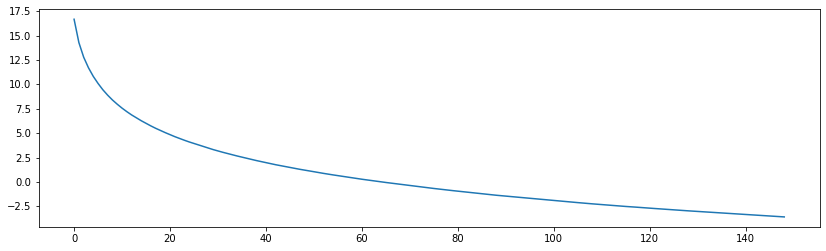

In [15]:
#definiciones necesarias para las funciones
AMPLITUD_RUIDO = 0.2
ATENUACION = 0.5

#Analógica
signal = analogica.copy()
graph = []

for n in range(1, 150):
    SEGMENTOS = n
    for i in range(0, SEGMENTOS):
        y_analogica = transmission_analogica(signal, AMPLITUD_RUIDO, ATENUACION)
        signal = y_analogica.copy()

    graph.append(SNR(y_analogica, analogica))
    print ('Transmision analógica: SNR = %f dB' % SNR(y_analogica, analogica)) 

#Prueba de la señal analógica
plt.plot(graph)
plt.show()

Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB


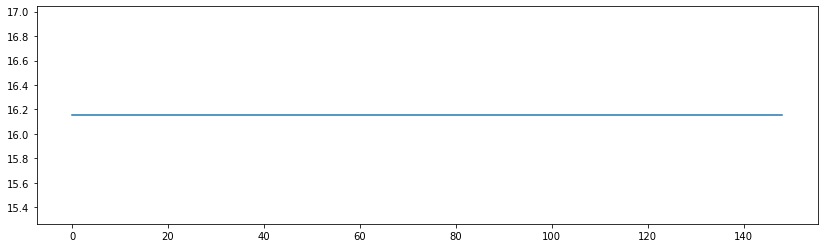

In [16]:
#Digital
signal = digital.copy()
graph = []

for n in range(1, 150):
    SEGMENTOS = n
    for i in range(0, SEGMENTOS):
        y_digital = transmission_digital(signal, AMPLITUD_RUIDO, ATENUACION)
        signal = y_digital.copy()

    graph.append(SNR(y_digital, analogica))
    print ('Transmision digital: SNR = %f dB' % SNR(y_digital, analogica)) 

#Prueba de la señal digital
#plt.plot(y_analogica)
#plt.plot(y_digital)
#plt.show()
#IPython.display.Audio(y_digital, rate=rate)
plt.plot(graph)
plt.show()

#### Ejercicio 2

Dejando los valores de amplitud de ruido y de segmentos constantes (los iniciales) vamos a probar a introducir diferentes niveles de atenuación (entre 0 y 1) y ver el efecto en el SNR en las dos señales


Transmision analógica: SNR = -9.563393 dB
Transmision analógica: SNR = -10.050616 dB
Transmision analógica: SNR = -10.230827 dB
Transmision analógica: SNR = -10.332353 dB
Transmision analógica: SNR = -10.391025 dB
Transmision analógica: SNR = -10.430390 dB
Transmision analógica: SNR = -10.456525 dB
Transmision analógica: SNR = -10.478940 dB
Transmision analógica: SNR = -10.495834 dB
Transmision analógica: SNR = -10.508633 dB
Transmision analógica: SNR = -10.519288 dB
Transmision analógica: SNR = -10.529392 dB
Transmision analógica: SNR = -10.536971 dB
Transmision analógica: SNR = -10.544252 dB
Transmision analógica: SNR = -10.549292 dB
Transmision analógica: SNR = -10.553935 dB
Transmision analógica: SNR = -10.557272 dB
Transmision analógica: SNR = -10.561681 dB
Transmision analógica: SNR = -10.566063 dB
Transmision analógica: SNR = -10.568805 dB
Transmision analógica: SNR = -10.572707 dB
Transmision analógica: SNR = -10.575112 dB
Transmision analógica: SNR = -10.577460 dB
Transmision 

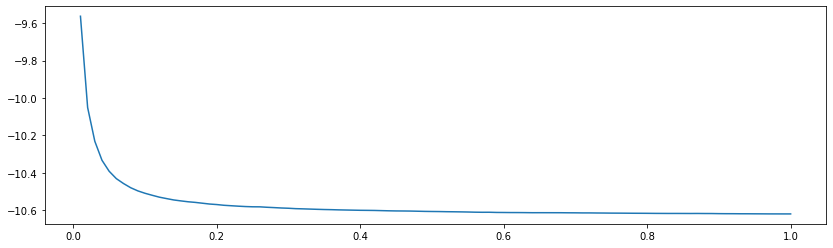

In [25]:
#definiciones necesarias para las funciones
SEGMENTOS = 70
AMPLITUD_RUIDO = 0.2

#Analógica
signal = analogica.copy()
graph = []
list_at = []
ATENUACION = 0

while(ATENUACION <= 1):
    ATENUACION += 0.01
    for i in range(0, SEGMENTOS):
        y_analogica = transmission_analogica(signal, AMPLITUD_RUIDO, ATENUACION)
        signal = y_analogica.copy()

    list_at.append(ATENUACION)
    graph.append(SNR(y_analogica, analogica))
    print ('Transmision analógica: SNR = %f dB' % SNR(y_analogica, analogica)) 

#Prueba de la señal analógica
plt.plot(list_at, graph)
plt.show()

Transmision digital: SNR = -6.533054 dB
Transmision digital: SNR = -7.033866 dB
Transmision digital: SNR = -7.218072 dB
Transmision digital: SNR = -7.305893 dB
Transmision digital: SNR = -7.373604 dB
Transmision digital: SNR = -7.419195 dB
Transmision digital: SNR = -7.445735 dB
Transmision digital: SNR = -7.470288 dB
Transmision digital: SNR = -7.492584 dB
Transmision digital: SNR = -7.514958 dB
Transmision digital: SNR = -7.533001 dB


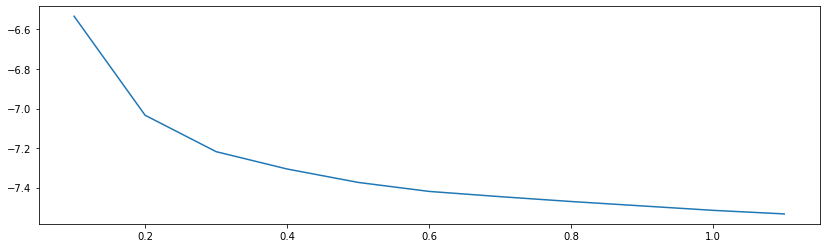

In [24]:
#Digital
signal = digital.copy()
graph = []
list_at = []
ATENUACION = 0

while(ATENUACION <= 1):
    ATENUACION += 0.1
    for i in range(0, SEGMENTOS):
        y_digital = transmission_digital(signal, AMPLITUD_RUIDO, ATENUACION)
        signal = y_digital.copy()

    list_at.append(ATENUACION)
    graph.append(SNR(y_digital, analogica))
    print ('Transmision digital: SNR = %f dB' % SNR(y_digital, analogica)) 

#Prueba de la señal digital
plt.plot(list_at, graph)
plt.show()

#### Ejercicio 3

Dejando el resto de los valores constantes vamos a modificar la amplitud del ruido con valores entre 0 y 1 y ver su efecto a través del SNR en las señales. 

Transmision analógica: SNR = 20.446263 dB
Transmision analógica: SNR = 16.967584 dB
Transmision analógica: SNR = 14.717861 dB
Transmision analógica: SNR = 13.059308 dB
Transmision analógica: SNR = 11.757549 dB
Transmision analógica: SNR = 10.660031 dB
Transmision analógica: SNR = 9.715896 dB
Transmision analógica: SNR = 8.895614 dB
Transmision analógica: SNR = 8.181969 dB
Transmision analógica: SNR = 7.537843 dB
Transmision analógica: SNR = 6.931893 dB
Transmision analógica: SNR = 6.387295 dB
Transmision analógica: SNR = 5.883842 dB
Transmision analógica: SNR = 5.420739 dB
Transmision analógica: SNR = 4.974359 dB
Transmision analógica: SNR = 4.581907 dB
Transmision analógica: SNR = 4.198283 dB
Transmision analógica: SNR = 3.824353 dB
Transmision analógica: SNR = 3.474043 dB
Transmision analógica: SNR = 3.149917 dB
Transmision analógica: SNR = 2.847370 dB
Transmision analógica: SNR = 2.553444 dB
Transmision analógica: SNR = 2.275106 dB
Transmision analógica: SNR = 2.003338 dB
Transmisio

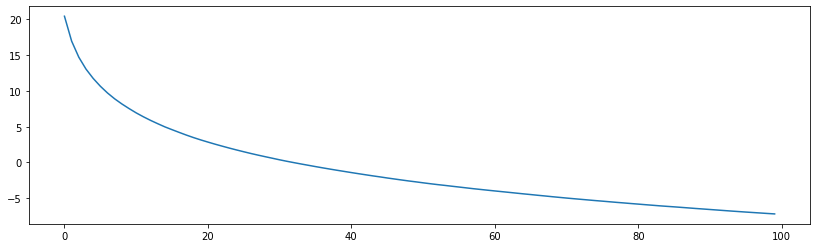

In [19]:
#definiciones necesarias para las funciones
SEGMENTOS = 70
ATENUACION = 0.5

#Analógica
signal = analogica.copy()
graph = []
AMPLITUD_RUIDO = 0

while(AMPLITUD_RUIDO <= 1):
    AMPLITUD_RUIDO += 0.01
    for i in range(0, SEGMENTOS):
        y_analogica = transmission_analogica(signal, AMPLITUD_RUIDO, ATENUACION)
        signal = y_analogica.copy()

    graph.append(SNR(y_analogica, analogica))
    print ('Transmision analógica: SNR = %f dB' % SNR(y_analogica, analogica)) 

#Prueba de la señal analógica
plt.plot(graph)
plt.show()

Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB
Transmision digital: SNR = 16.154382 dB


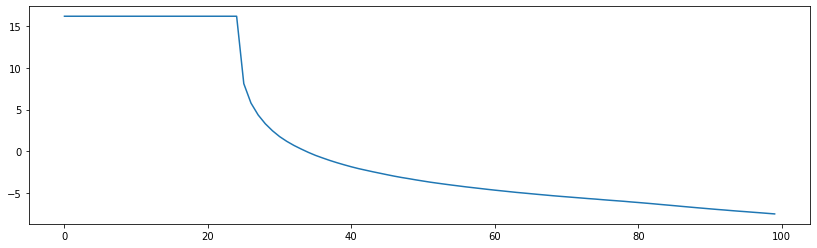

In [20]:
#Digital
signal = digital.copy()
graph = []
AMPLITUD_RUIDO = 0

while(AMPLITUD_RUIDO <= 1):
    AMPLITUD_RUIDO += 0.01
    for i in range(0, SEGMENTOS):
        y_digital = transmission_digital(signal, AMPLITUD_RUIDO, ATENUACION)
        signal = y_digital.copy()

    graph.append(SNR(y_digital, analogica))
    print ('Transmision digital: SNR = %f dB' % SNR(y_digital, analogica)) 

#Prueba de la señal digital
plt.plot(graph)
plt.show()